In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
seed = 42

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv', encoding = 'ISO-8859-1')
df_test = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv', encoding = 'ISO-8859-1')

In [3]:
df = df_train.append(df_test)

df_train, df_test = train_test_split(df, test_size = 0.25)

print(df_train.shape, df_test.shape)

df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

(976, 13) (326, 13)


In [4]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",1366x768,AMD A6-Series 9220 2.9GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0
2,Acer,Nitro AN515-51,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0
3,MSI,GT73VR Titan,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0
4,HP,ProBook 650,Notebook,"15.6""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              976 non-null    object 
 1   Model Name                976 non-null    object 
 2   Category                  976 non-null    object 
 3   Screen Size               976 non-null    object 
 4   Screen                    976 non-null    object 
 5   CPU                       976 non-null    object 
 6   RAM                       976 non-null    object 
 7    Storage                  976 non-null    object 
 8   GPU                       976 non-null    object 
 9   Operating System          976 non-null    object 
 10  Operating System Version  845 non-null    object 
 11  Weight                    976 non-null    object 
 12  Price                     976 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.2+ KB


There's just one numerical columns: 'Price'

It could be good idea to change other columns into numerical, such as CPU, RAM, Memory and Weight

In [6]:
df_train.describe()

,Price
count,9.760000e+02
mean,9.929174e+06
std,6.172964e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.589227e+06
75%,1.296898e+07
max,4.889711e+07


Using the 'describe' method of the dataframe, we can get some first insights on the numerical columns.

# Data Cleaning 

Before exploring the data with EDA, we will perform some data cleaning.

First, we will change the columns into lower case.

In [7]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [8]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

## Check for duplicates

In [9]:
df_train[df_train.duplicated()]

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
216,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00
245,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00
249,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.3kg,4081428.00
318,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows,10,2.20kg,3370068.00
326,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
337,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows,10,2.2kg,6405085.44
372,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00
448,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
560,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.2kg,6482268.00
592,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,NaN,2.4kg,2569788.00


Good, there are no duplicates

Next, we will analyze each column and get some insights.

# Dataset Cleaning + Feature Engineering

## Screen resolution

In [10]:
df_train['screen']

0         Full HD / Touchscreen 1920x1080
1                                1366x768
2             IPS Panel Full HD 1920x1080
3                       Full HD 1920x1080
4                                1366x768
                      ...                
971           IPS Panel Full HD 1920x1080
972                              1366x768
973    IPS Panel Retina Display 2304x1440
974                     Full HD 1920x1080
975                              1366x768
Name: screen, Length: 976, dtype: object

In the screen resolution column, there are included multiple useful informations.<br>
-Screen type<br>
-Resolution<br>
-Touchscreen<br>

We will separate this 3 informations in 3 different columns.

### Feature Engineering on Screen resolution

In [11]:
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [12]:
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','', regex = True)
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d+)','', regex = True)

In [13]:
df_train['screen_type'] = df_train['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)

In [14]:
df_train['screen_type']

0                   Touchscreen 
1                               
2                    IPS Panel  
3                               
4                               
                 ...            
971                  IPS Panel  
972                             
973    IPS Panel Retina Display 
974                             
975                             
Name: screen_type, Length: 976, dtype: object

Now we can extract the information about the presence of a touchscreen or not

In [15]:
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')
df_train['screen_type'] = df_train['screen_type'].replace(r'(Touchscreen)','', regex = True)

df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test['screen_type'] = df_test['screen_type'].replace(r'(Touchscreen)','', regex = True)

In [16]:
df_train['touchscreen'].value_counts()

Touchscreen    145
Name: touchscreen, dtype: int64

In [17]:
df_train['touchscreen'] = df_train['touchscreen'].replace('Touchscreen', 1)
df_train['touchscreen'] = df_train['touchscreen'].replace(np.nan, 0)

df_test['touchscreen'] = df_test['touchscreen'].replace('Touchscreen', 1)
df_test['touchscreen'] = df_test['touchscreen'].replace(np.nan, 0)

In [18]:
df_train['touchscreen'].value_counts()

0.0    831
1.0    145
Name: touchscreen, dtype: int64

In [19]:
df_train['screen_type'].value_counts()

                             421
                             232
IPS Panel                    188
                              59
IPS Panel                     54
IPS Panel                     11
IPS Panel Retina Display      11
Name: screen_type, dtype: int64

In [20]:
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)

df_train['screen_type'].value_counts()

                         712
IPSPanel                 253
IPSPanelRetinaDisplay     11
Name: screen_type, dtype: int64

Now we just need to subsitute the blank spaces with a 'NaN'

In [21]:
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

IPSPanel                 253
IPSPanelRetinaDisplay     11
Name: screen_type, dtype: int64

Great! Now the dataframe looks like:

In [22]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0,1920x1080,NaN,1.0
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",1366x768,AMD A6-Series 9220 2.9GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0,1366x768,NaN,0.0
2,Acer,Nitro AN515-51,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0,1920x1080,IPSPanel,0.0
3,MSI,GT73VR Titan,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0,1920x1080,NaN,0.0
4,HP,ProBook 650,Notebook,"15.6""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0,1366x768,NaN,0.0


We can so drop the original 'screen' column!

In [23]:
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis = 1)

In [24]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0,1920x1080,NaN,1.0
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220 2.9GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0,1366x768,NaN,0.0
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0,1920x1080,IPSPanel,0.0
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0,1920x1080,NaN,0.0
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0,1366x768,NaN,0.0


The newly created columns are as follows:

In [25]:
df_train['resolution'].value_counts()

1920x1080    640
1366x768     226
3840x2160     24
3200x1800     23
2560x1440     19
1600x900      18
1920x1200      5
2256x1504      5
2560x1600      4
2880x1800      4
1440x900       2
2400x1600      2
2304x1440      2
2736x1824      1
2160x1440      1
Name: resolution, dtype: int64

In [26]:
df_train['screen_type'].value_counts()

IPSPanel                 253
IPSPanelRetinaDisplay     11
Name: screen_type, dtype: int64

In [27]:
df_train['touchscreen'].value_counts()

0.0    831
1.0    145
Name: touchscreen, dtype: int64

Everything looks okay.<br>
Now we will perform the same feature engineering process to CPU column

## CPU

In [28]:
df_train['cpu']

0       Intel Core i5 8250U 1.6GHz
1        AMD A6-Series 9220 2.9GHz
2      Intel Core i5 7300HQ 2.5GHz
3      Intel Core i7 7820HK 2.9GHz
4       Intel Core i5 6200U 2.3GHz
                  ...             
971     Intel Core i7 7500U 2.7GHz
972     Intel Core i3 6100U 2.1GHz
973            Intel Core M 1.1GHz
974     Intel Core i5 7200U 2.5GHz
975     Intel Core i5 7200U 2.5GHz
Name: cpu, Length: 976, dtype: object

We want to extract the CPU Frequency into a different column

In [29]:
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

With this regex we can extract both float and int frequencies for the CPU

In [30]:
df_train['cpu_freq'].value_counts()

2.5GHz     226
2.7GHz     127
2.8GHz     119
1.6GHz      91
2.3GHz      64
1.8GHz      57
2.6GHz      54
2GHz        53
2.4GHz      40
1.1GHz      35
2.9GHz      16
2.0GHz      15
3GHz        14
1.2GHz      12
1.44GHz     12
1.5GHz       9
2.2GHz       6
3.6GHz       5
1.3GHz       4
2.1GHz       3
0.9GHz       3
1.9GHz       2
3.1GHz       2
2.50GHz      2
3.2GHz       1
1.60GHz      1
1.92GHz      1
1.0GHz       1
2.70GHz      1
Name: cpu_freq, dtype: int64

Since all the frequencies are in GHz, we can now simply remove 'GHz' and add it to the column name, such that the column can become numerical

In [31]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

In [32]:
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

Then, we delete the frequency from the CPU column.

In [33]:
df_train['cpu']= df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
df_test['cpu']= df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)

In [34]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0,1920x1080,NaN,1.0,1.6
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4GB,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0,1366x768,NaN,0.0,2.9
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0,1920x1080,IPSPanel,0.0,2.5
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0,1920x1080,NaN,0.0,2.9
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0,1366x768,NaN,0.0,2.3


## RAM

We will remove GB from each row and add it in the column name instead.

In [35]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [36]:
df_train.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_test.rename(columns = {'ram': 'ram(GB)'}, inplace = True)

In [37]:
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [38]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,256GB SSD,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0,1920x1080,NaN,1.0,1.6
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0,1366x768,NaN,0.0,2.9
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0,1920x1080,IPSPanel,0.0,2.5
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0,1920x1080,NaN,0.0,2.9
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,500GB HDD,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0,1366x768,NaN,0.0,2.3


## Memory

In [39]:
df_train[' storage']

0                 256GB SSD
1                 500GB HDD
2                 256GB SSD
3      512GB SSD +  1TB HDD
4                 500GB HDD
               ...         
971               256GB SSD
972               128GB SSD
973     256GB Flash Storage
974               256GB SSD
975               500GB HDD
Name:  storage, Length: 976, dtype: object

We can extract lots of informations from this column. We can see that some laptops have 2 hard drives, there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. We will create new columns to include all these information.

First, let's convert all the element into GB

In [40]:
df_train[' storage'].value_counts()

256GB SSD                 328
1TB HDD                   168
500GB HDD                  99
512GB SSD                  78
128GB SSD +  1TB HDD       66
128GB SSD                  62
256GB SSD +  1TB HDD       51
32GB Flash Storage         27
2TB HDD                    13
512GB SSD +  1TB HDD       12
64GB Flash Storage         10
1TB SSD                     9
256GB SSD +  2TB HDD        8
1TB Hybrid                  7
256GB Flash Storage         4
16GB Flash Storage          4
1GB SSD                     4
32GB SSD                    4
128GB SSD +  2TB HDD        2
16GB SSD                    2
256GB SSD +  500GB HDD      2
512GB SSD +  2TB HDD        2
128GB Flash Storage         2
1TB SSD +  1TB HDD          1
240GB SSD                   1
256GB SSD +  256GB SSD      1
1TB HDD +  1TB HDD          1
32GB HDD                    1
128GB HDD                   1
508GB Hybrid                1
512GB SSD +  512GB SSD      1
512GB Flash Storage         1
8GB SSD                     1
64GB SSD  

In [41]:
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [42]:
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB','1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB','2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB','')
df_train['storage_1'].value_counts()

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB','1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB','2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB','')

We transformed the drive capacity to GB

In [43]:
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ','')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ','')

df_train['storage_2'].value_counts()

256SSD             328
1000HDD            168
500HDD              99
512SSD              78
128SSD+1000HDD      66
128SSD              62
256SSD+1000HDD      51
32FlashStorage      27
2000HDD             13
512SSD+1000HDD      12
64FlashStorage      10
1000SSD              9
256SSD+2000HDD       8
1000Hybrid           7
256FlashStorage      4
16FlashStorage       4
1SSD                 4
32SSD                4
128SSD+2000HDD       2
16SSD                2
256SSD+500HDD        2
512SSD+2000HDD       2
128FlashStorage      2
1000SSD+1000HDD      1
240SSD               1
256SSD+256SSD        1
1000HDD+1000HDD      1
32HDD                1
128HDD               1
508Hybrid            1
512SSD+512SSD        1
512FlashStorage      1
8SSD                 1
64SSD                1
512SSD+256SSD        1
Name: storage_2, dtype: int64

In [44]:
storage_1 = []
storage_2 = []

for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')


In [45]:
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+',i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')


Now we have separated the drives into two lists. We will now create two more lists that will contain the memory types.

In [46]:
storage_1_gb = []
storage_1_type = []
for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])

In [47]:
s1_gb = []
s1_type = []
for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

We created succesfully two lists for memory_1 in order to include the capacity and type for each memory 1

### Memory 2

In [48]:
storage_2_gb = []
storage_2_type = []
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [49]:
s2_gb = []
s2_type = []
for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)',i)[0])
        s2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

We created the same two lists that will contain type and capacity also for the second drive

In [50]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

In [51]:
df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

Then we convert the capacity related columns to floats

In [52]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [53]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,256GB SSD,Intel UHD Graphics 620,Windows,10,...,1920x1080,NaN,1.0,1.6,256 SSD,256SSD,256.0,SSD,0.0,NaN
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,500GB HDD,AMD Radeon R4 Graphics,No OS,NaN,...,1366x768,NaN,0.0,2.9,500 HDD,500HDD,500.0,HDD,0.0,NaN
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,...,1920x1080,IPSPanel,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,...,1920x1080,NaN,0.0,2.9,512 SSD + 1000 HDD,512SSD+1000HDD,512.0,SSD,1000.0,HDD
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,500GB HDD,Intel HD Graphics 520,Windows,10,...,1366x768,NaN,0.0,2.3,500 HDD,500HDD,500.0,HDD,0.0,NaN


In [54]:
df_train = df_train.drop(['storage_1','storage_2',' storage'], axis = 1)
df_test = df_test.drop(['storage_1','storage_2',' storage'], axis = 1)

In [55]:
df_train = df_train.replace({'NaN' : np.nan})
df_test = df_test.replace({'NaN' : np.nan})

In [56]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,2.67kg,7104708.0,1920x1080,NaN,1.0,1.6,256.0,SSD,0.0,NaN
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,AMD Radeon R4 Graphics,No OS,NaN,2.2kg,2747628.0,1366x768,NaN,0.0,2.9,500.0,HDD,0.0,NaN
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Windows,10,2.5kg,7522632.0,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,Nvidia GeForce GTX 1070,Windows,10,4.14kg,24266268.0,1920x1080,NaN,0.0,2.9,512.0,SSD,1000.0,HDD
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,2.31kg,10661508.0,1366x768,NaN,0.0,2.3,500.0,HDD,0.0,NaN


## Weight

In [57]:
df_train['weight'].value_counts()

2.2kg      96
2.1kg      37
2.4kg      33
2.5kg      29
2kg        28
           ..
3.35kg      1
2.191kg     1
1.59kg      1
1.17kg      1
3.21kg      1
Name: weight, Length: 166, dtype: int64

Do all rows have a weight specified in kg?

In [58]:
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

976 976


Yes, every rows returned a True value (1), so we can say that every row has the weight specified in kg. Now we will remove 'kg' from the rows.

In [59]:
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)
df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [60]:
df_train.rename(columns = {'weight': 'weight(kg)'}, inplace = True)
df_test.rename(columns = {'weight': 'weight(kg)'}, inplace = True)

In [61]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,2.67,7104708.0,1920x1080,NaN,1.0,1.6,256.0,SSD,0.0,NaN
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,AMD Radeon R4 Graphics,No OS,NaN,2.20,2747628.0,1366x768,NaN,0.0,2.9,500.0,HDD,0.0,NaN
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Windows,10,2.50,7522632.0,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,Nvidia GeForce GTX 1070,Windows,10,4.14,24266268.0,1920x1080,NaN,0.0,2.9,512.0,SSD,1000.0,HDD
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,2.31,10661508.0,1366x768,NaN,0.0,2.3,500.0,HDD,0.0,NaN


## CPU and GPU manifacturing companies

In [62]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

df_train['cpu_brand'].value_counts()

Intel    928
AMD       48
Name: cpu_brand, dtype: int64

In [63]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

df_train['gpu_brand'].value_counts()

Intel     543
Nvidia    293
AMD       140
Name: gpu_brand, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  845 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               264 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

Now the dataset looks clean and ready to be explored

In [65]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

# Exploratory Data Analysis EDA

In [66]:
df1 = pd.read_csv('laptop-clean-train.csv')
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,2.67,...,1920x1080,NaN,1.0,1.6,256.0,SSD,0.0,NaN,Intel,Intel
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,AMD Radeon R4 Graphics,No OS,NaN,2.20,...,1366x768,NaN,0.0,2.9,500.0,HDD,0.0,NaN,AMD,AMD
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Windows,10,2.50,...,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Nvidia
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,Nvidia GeForce GTX 1070,Windows,10,4.14,...,1920x1080,NaN,0.0,2.9,512.0,SSD,1000.0,HDD,Intel,Nvidia
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,2.31,...,1366x768,NaN,0.0,2.3,500.0,HDD,0.0,NaN,Intel,Intel


Moreover, we will create a new dataframe df2 which will contain a further cleaned version of df (without outliers etc..)

In [67]:
df_clean = df1.copy()

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  845 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               264 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [69]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

# Which brand is the most frequent in the dataframe?

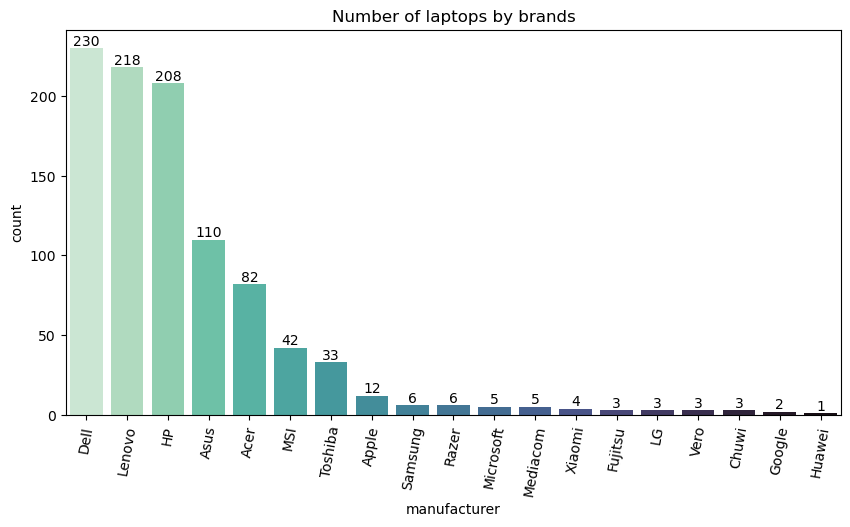

In [70]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette='mako_r', order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

Most of laptops are from Dell, Lenovo and HP.

# What type of laptop is the most frequent?

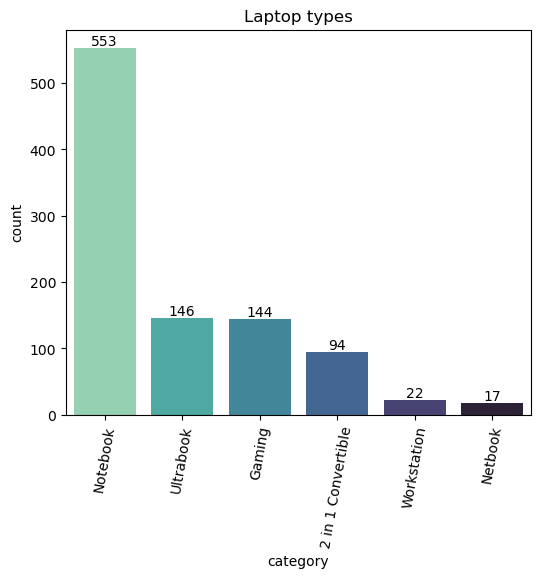

In [71]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'category', data = df_train, palette = 'mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

Most laptops are of type notebooks followed by ultrabook and then the gaming ones.

# Which size is the most popular?

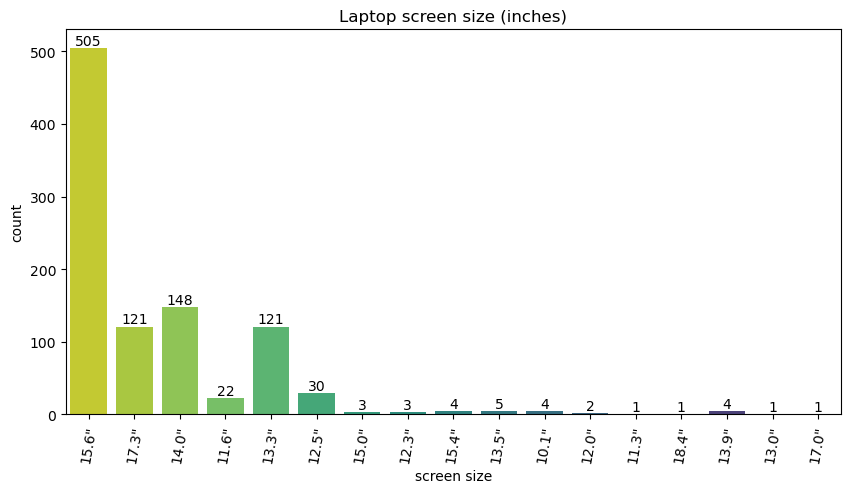

In [72]:
fig, ax  = plt.subplots(figsize = (10,5))
ax=sns.countplot(x = 'screen size', data = df_train, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

Majority of the laptops have 15.6 inches.

There are very few laptops with some "non conventional" sizes, which indeed appears in just few rows. For this reason, we will only keep laptops with the more conventional sizes.

In [73]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '13.3"', '17.3"', '12.5"', '11.6"']

We will keep laptops with these 6 sizes!

In [74]:
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

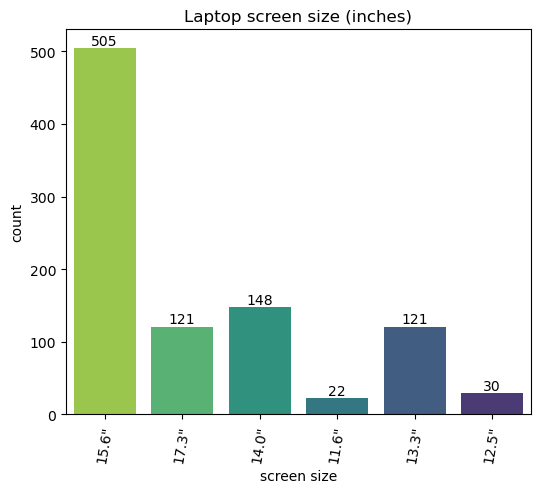

In [75]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'screen size', data = df_clean, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [76]:
print('We removed {} outliers!'.format(len(df_train)-len(df_clean)))

We removed 29 outliers!


## How is weight distributed among the laptops?

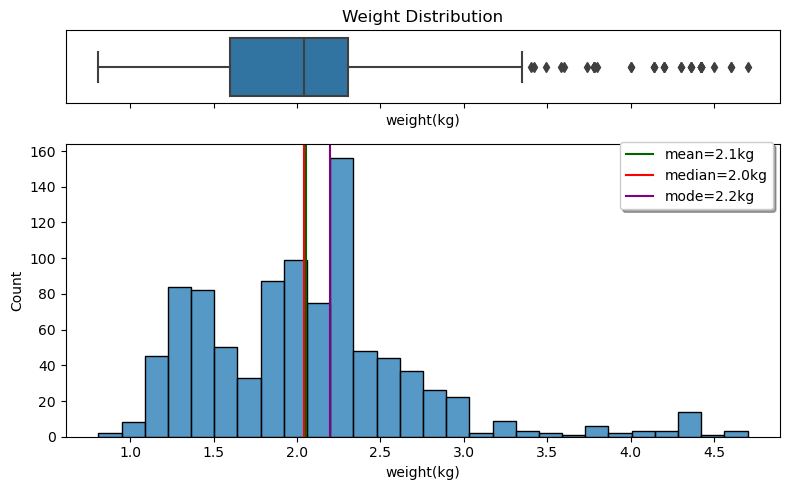

In [77]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

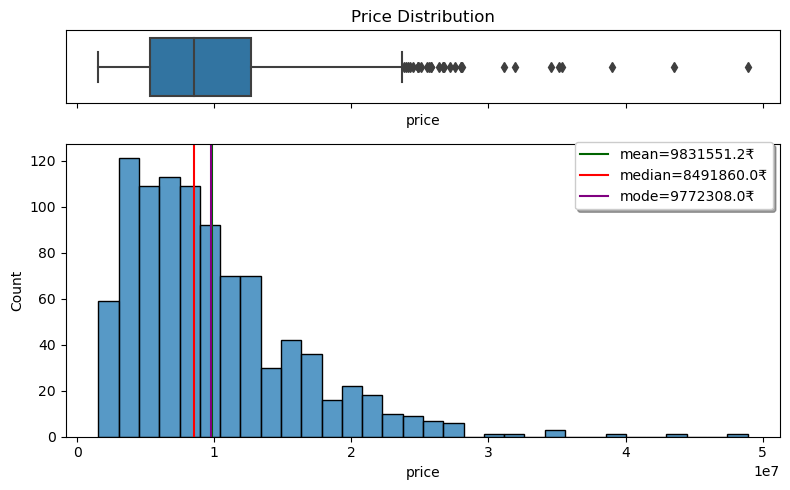

In [78]:
num_plot(df_clean, 'price', 'Price Distribution','₹')

In [79]:
import plotly.express as px
fig = px.box(df_train, y = 'price')
fig.show()

In [80]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<AxesSubplot:xlabel='category', ylabel='price'>

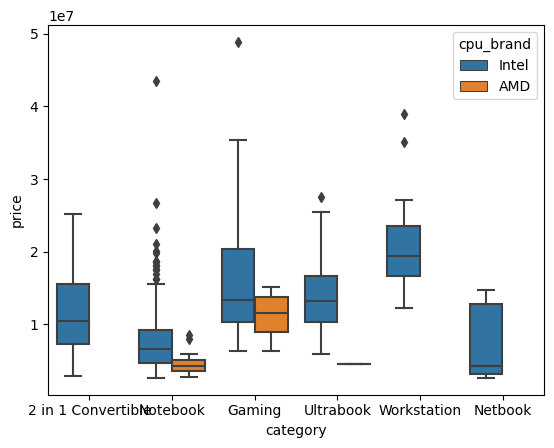

In [81]:
sns.boxplot(x = 'category', y = 'price', data = df_train[df_train['price'] > 2500000], hue = 'cpu_brand')

In [82]:
df_train[df_train['price'] > 2500000]

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Inspiron 5579,2 in 1 Convertible,"15.6""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,2.67,...,1920x1080,NaN,1.0,1.6,256.0,SSD,0.0,NaN,Intel,Intel
1,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,AMD Radeon R4 Graphics,No OS,NaN,2.20,...,1366x768,NaN,0.0,2.9,500.0,HDD,0.0,NaN,AMD,AMD
2,Acer,Nitro AN515-51,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Windows,10,2.50,...,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Nvidia
3,MSI,GT73VR Titan,Gaming,"17.3""",Intel Core i7 7820HK,16.0,Nvidia GeForce GTX 1070,Windows,10,4.14,...,1920x1080,NaN,0.0,2.9,512.0,SSD,1000.0,HDD,Intel,Nvidia
4,HP,ProBook 650,Notebook,"15.6""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,2.31,...,1366x768,NaN,0.0,2.3,500.0,HDD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Lenovo,Thinkpad X270,Ultrabook,"12.5""",Intel Core i7 7500U,8.0,Intel HD Graphics 620,Windows,10,1.36,...,1920x1080,IPSPanel,0.0,2.7,256.0,SSD,0.0,NaN,Intel,Intel
972,Toshiba,Satellite Pro,Notebook,"15.6""",Intel Core i3 6100U,4.0,Intel HD Graphics 520,Windows,10,2.10,...,1366x768,NaN,0.0,2.1,128.0,SSD,0.0,NaN,Intel,Intel
973,Apple,"MacBook 12""",Ultrabook,"12.0""",Intel Core M,8.0,Intel HD Graphics 5300,Mac OS,X,0.92,...,2304x1440,IPSPanelRetinaDisplay,0.0,1.1,256.0,FlashStorage,0.0,NaN,Intel,Intel
974,Lenovo,ThinkPad 13,Notebook,"13.3""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.44,...,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel


## How is RAM distributed among the laptops?

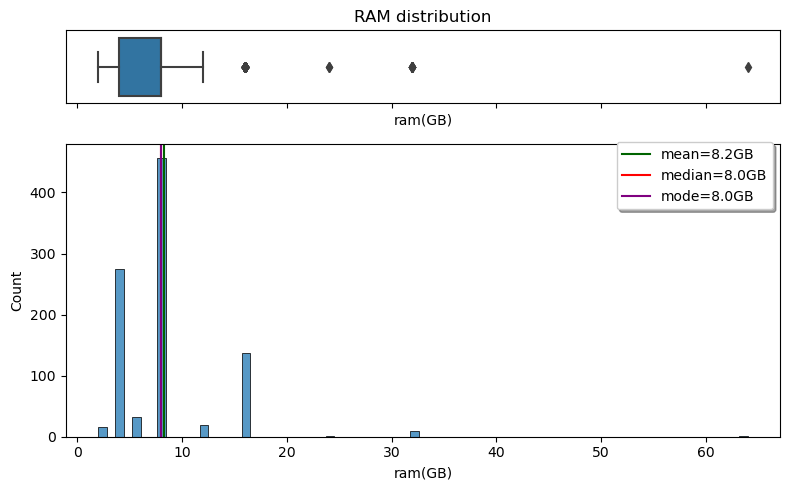

In [83]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

Most laptops have 8 GB ram.

## How is CPU frequency distributed among the laptops?

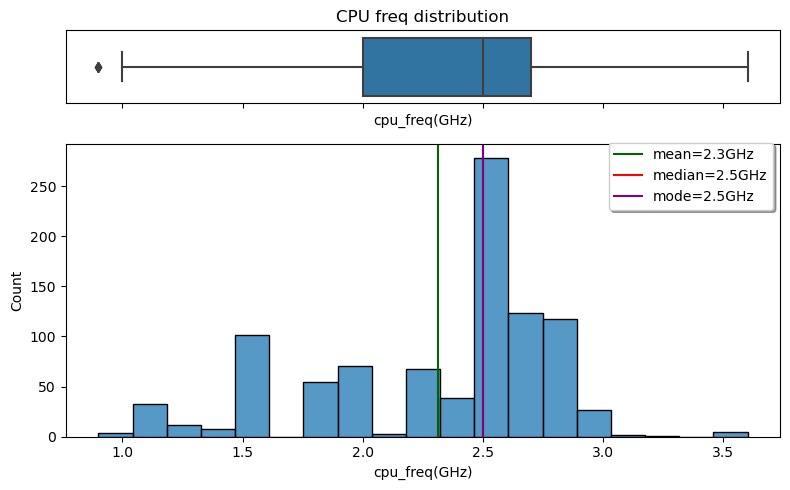

In [84]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

Most laptops have 2.5 GHz CPU

## How is Hard Drive capacity distributed among the laptops?

First, we will analyze the first hard drive storage capacity

In [85]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

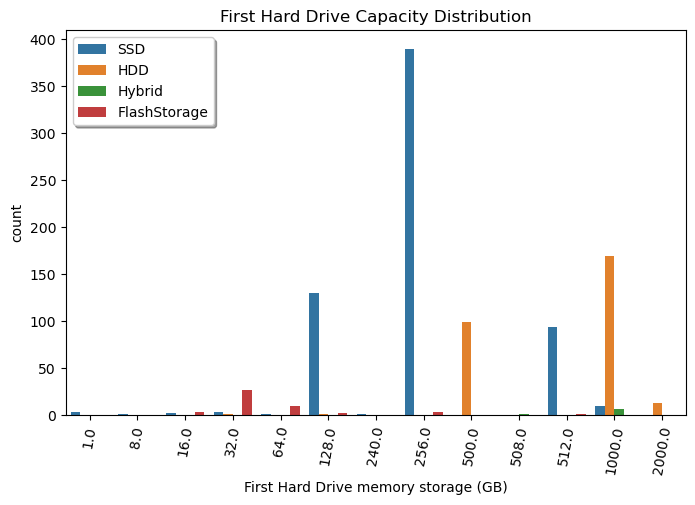

In [86]:
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most PCs have 256 GB of storage, which is for the most part SSD. Moreover, for storage of 1 TB or higher, most of them are HDD.

### Second hard Drive analysis

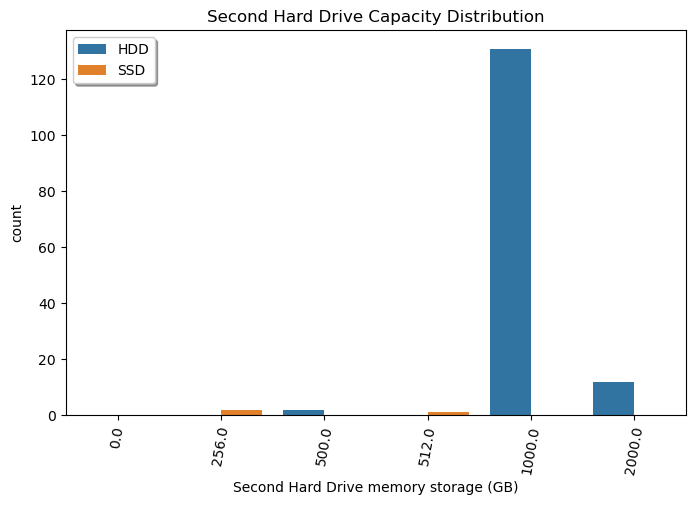

In [87]:
fig, ax  = plt.subplots(figsize = (8,5))
ax=sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most of second hard drive storages are 1 TB HDD disks

Until now we analyzed each single feature at a time, in the following we will analyze these features together to find useful insghts about the data.

# Multivariate outliers detection

## Price vs RAM

We define a custom plot function, which computes, returns and plots a linear regression line.

In [88]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

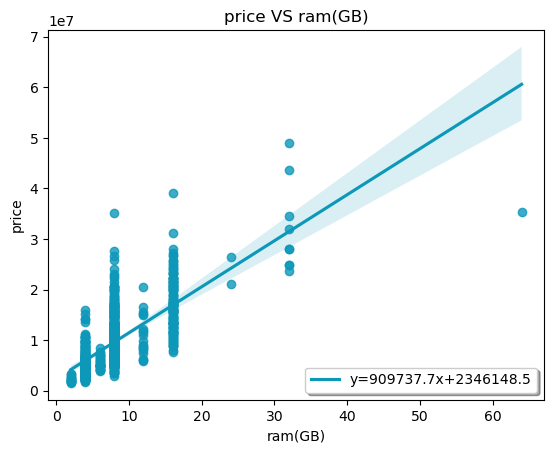

In [89]:
slope, intercept = lr_plot(df_clean,'ram(GB)','price', 'lower right')

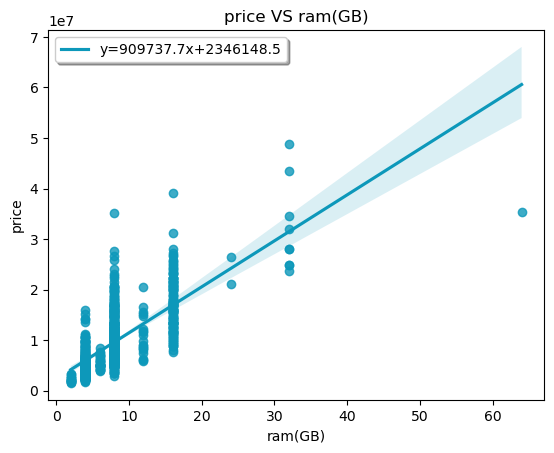

In [90]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'upper left')

By removing the outlier value we can see that the slope increases and the intercept decreases.

## Price vs CPU Frequency

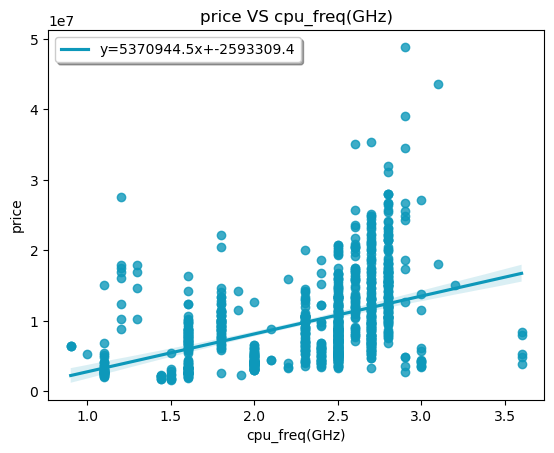

In [91]:
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price', 'upper left')

We can see a positive trend between price and the CPU frequency, with no obvious outliers. <br>

## Price vs inches

In [92]:
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

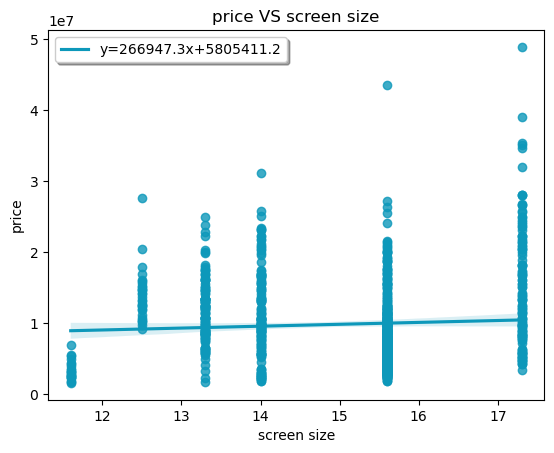

In [93]:
slope, intercept = lr_plot(df_clean, 'screen size', 'price', 'upper left')

The regression line is almost flat, meaning that PCs with higher screen inches slightly tends to be more expensive.

## Weight vs Inches

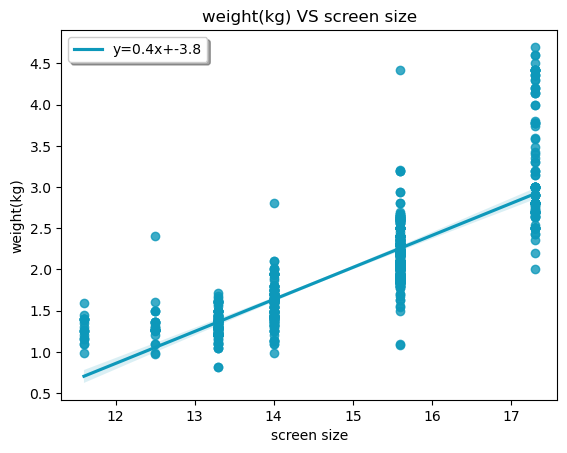

In [94]:
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')

As expected, PCs with bigger screens are heavier. In particular, on average, for every additional inch the pc is 400g heavier.

# Price VS CPU brand by GPU brand

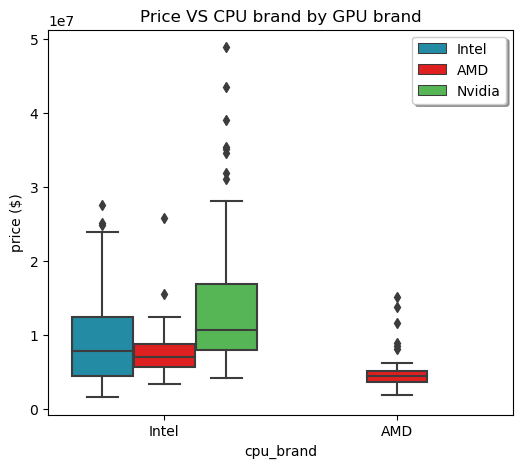

In [95]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = 'cpu_brand', y = 'price', data = df_clean, hue = 'gpu_brand', palette = cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc = 'upper right', ncol=1, fancybox = True, shadow = True, frameon = True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:
- Laptops with Intel CPUs are more expensive.
- Laptops with an AMD CPUs also hahave and AMD GPUs
- Laptops with Nvidia GPUs are more expensive.

# Which are the TOP 15 most common GPUs?

In [96]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

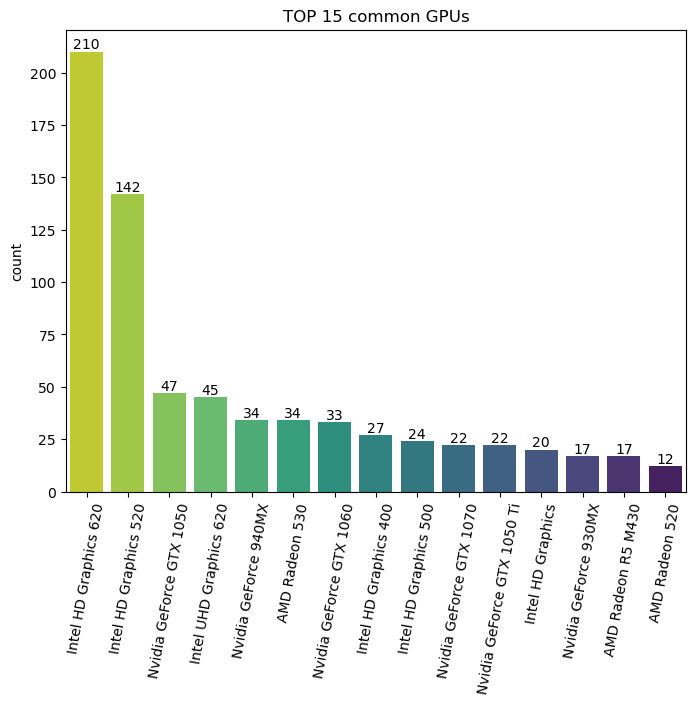

In [97]:
plt.figure(figsize = (8,6))
ax=sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette = 'viridis_r')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050. 

# Which are the TOP 15 most common CPUs?

In [98]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

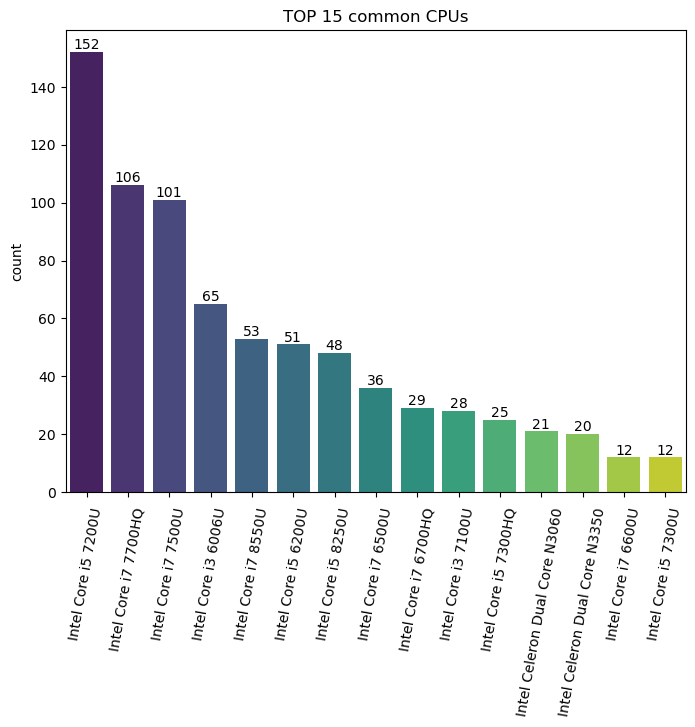

In [99]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette = 'viridis')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

- All the TOP 15 most common CPUs are from Intel.
- The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U.
- Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

# What is the average price of laptops by company?

As seen previously, there are some companies which have just few laptops in the dataset:

In [100]:
df_clean['manufacturer'].value_counts()

Dell        229
Lenovo      209
HP          207
Asus        110
Acer         82
MSI          41
Toshiba      33
Apple         6
Razer         6
Mediacom      5
Samsung       4
Xiaomi        4
LG            3
Vero          3
Fujitsu       3
Chuwi         2
Name: manufacturer, dtype: int64

In particular, there are companies with less than 10 laptops in the dataset, which is a very low number from which we can extract statistical results. <br>
For this reason, we will consider only laptops with at least 20 laptops in the dataset.

In [101]:
company_list = df_clean['manufacturer'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

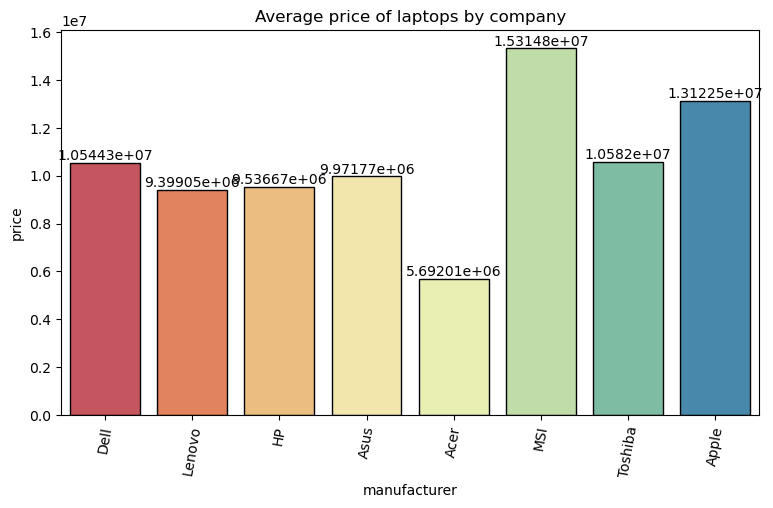

In [102]:
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'manufacturer', y = 'price', data = df_clean[df_clean['manufacturer'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

- MSI laptops are on average the most expensive.
- Apple laptops are the second most expensive laptops and Toshiba's are 3rd.
- Acer are the cheapest, with an average price of 626$
- Laptops from Dell, Lenovo, HP and Asus have, on average.

## Correlation Matrix

The correlation matrix can give some useful informations about the linear correlation between the numerical features

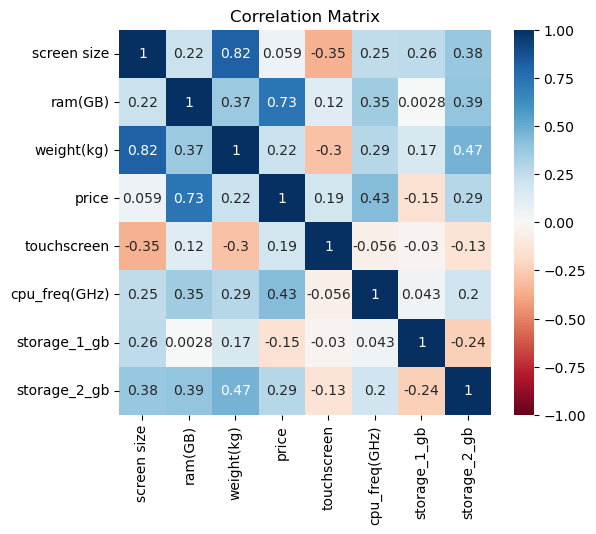

In [103]:
plt.figure(figsize = (6,5))
sns.heatmap(df_clean.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

Insights from the correlation matrix:
- RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
- CPU Freq has a quite moderate positive correlation with the price (+0.45) 
- Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

# Data preparation for ML modeling

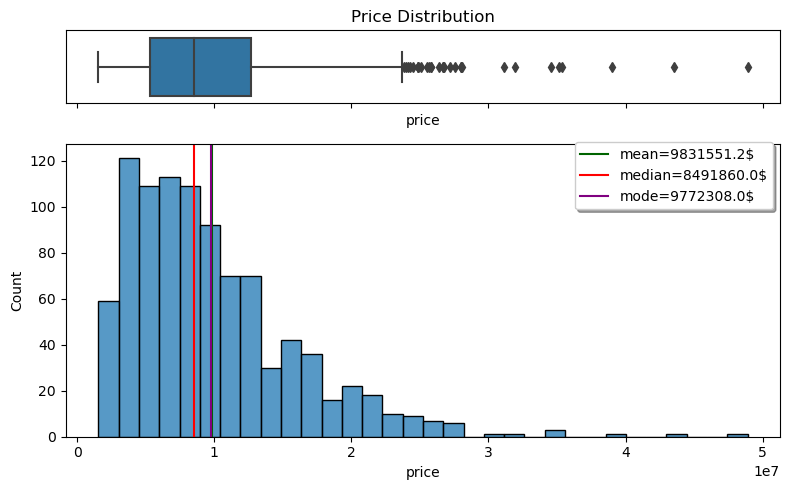

In [104]:
num_plot(df_clean, 'price', 'Price Distribution','$')

For prediction, we will use the cleaned dataframe 'df_clean'

In [105]:
df1 = df_clean.copy()

Moreover, since the target variable 'price' is right skewed, we will log transform it to improve the prediction performance of the algorithms.

In [106]:
df1['price'] = np.log(df1['price'])
df_test['price'] = np.log(df_test['price'])

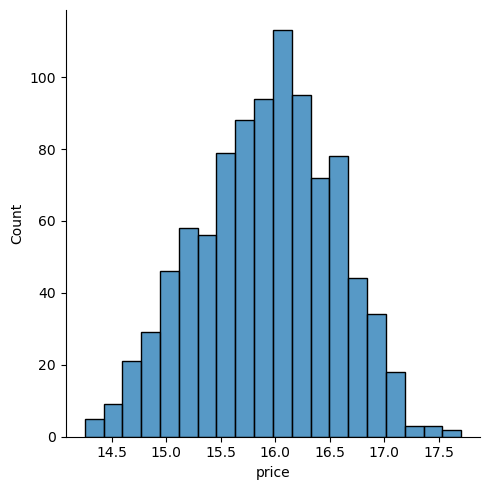

In [107]:
sns.displot(df1['price'])

Indeed now the distribution looks more gaussian.

In [108]:
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

## Categorical features encoding

The categorical columns ('company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand') will be now encoded. <br>
An encoding by one hot encoding would be preferrable in this case since there is not a order/hierarchy among the different categories for each variable, but this would lead to a very high number of columns (around 900), which is close to the number of total rows (1000).<br>
So, if we had more data a OHE encoding would be preferrable, but in case a Label Encoding will be performed to keep the number of features lower.

In [109]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [110]:
cat_cols =  ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system',
             'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
             'gpu_brand', 'cpu_brand']

In [111]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (947, 715)


In [112]:
#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])

print('Dataframe encoded by Label encoding dimension : ', df1.shape)

Dataframe encoded by Label encoding dimension :  (947, 21)


In [113]:
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,4,204,0,15.6,53,8.0,51,4,10,2.67,...,3,2,1.0,1.6,256.0,3,0.0,1,1,1
1,8,170,3,15.6,5,4.0,11,3,NaN,2.20,...,0,2,0.0,2.9,500.0,1,0.0,1,0,0
2,0,250,1,15.6,48,8.0,64,4,10,2.50,...,3,0,0.0,2.5,256.0,3,0.0,1,1,2
3,9,152,1,17.3,65,16.0,69,4,10,4.14,...,3,2,0.0,2.9,512.0,3,1000.0,0,1,2
4,6,294,3,15.6,42,4.0,40,4,10,2.31,...,0,2,0.0,2.3,500.0,1,0.0,1,1,1


## Data preparation

In [114]:
x_train = df1.drop('price', axis = 1).values
y_train = df1['price'].values

x_test = df_test.drop('price', axis = 1).values
y_test = df_test['price'].values

## Train - Validation split

Moreover, we define an additional validation set, which will be used to monitor overfitting.

In [115]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)

And now you can move on with buildig models!

Thanks for sparing your time! Do upvote if you liked it, This motivates hugely to come up with new explorations and keep exploring new domains.

It would be really nice if you check my other works and if you like my work then don't forget to follow for more interesting notebooks 🤗